In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy.linalg import eigvals
import numpy.random as rd
from copy import copy

# Questão 2.3

### Grafo em anel

In [2]:
P_anel = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        if (abs(i-j)==1) or (i==0 and j==99) or (i==99 and j==0):
            P_anel[i, j] = 1/4
        elif i==j:
            P_anel[i, j] = 1/2

pi_anel = np.array([1/100]*100)

p_anel_inicial = np.array([1] + [0]*99)

ls_dtv_anel = []
ls_t = []
p_local = p_anel_inicial
for t in range(103):
    p_local = np.matmul(p_local, P_anel)
    ls_dtv_anel.append(sum(abs(p_local - pi_anel)))
    ls_t.append(t+1)

df_anel = pd.DataFrame({"t": ls_t, "dtv": ls_dtv_anel})

### Grafo Árvore Binária Cheia

In [3]:
P_arvore = np.zeros((127, 127))

for i in range(1,128):
    for j in range(1,128):
        if (i==j) or (i > 63 and j == math.floor(i/2)):
            P_arvore[i-1, j-1] = 1/2
        elif (i==1) and (j in (2, 3)):
            P_arvore[i-1, j-1] = 1/4
        elif (i>=1 and i <= 63) and (j in (math.floor(i/2), 2*i, 2*i+1)):
            P_arvore[i-1, j-1] = 1/6

pi_arvore = np.zeros(127)
for i in range(1, 128):
    if i == 1:
        pi_arvore[i-1] = 1/126
    if (i >= 2) and (i <= 63):
        pi_arvore[i-1] = 1/84
    else:
        pi_arvore[i-1] = 1/252

p_arvore_inicial = np.array([1] + [0]*126)

ls_dtv_arvore = []
ls_t = []
p_local = p_arvore_inicial
for t in range(103):
    p_local = np.matmul(p_local, P_arvore)
    ls_dtv_arvore.append(sum(abs(p_local - pi_arvore)))
    ls_t.append(t+1)

df_arvore = pd.DataFrame({"t": ls_t, "dtv": ls_dtv_arvore})

### Grafo em Grid 2D

In [4]:
P_grid = np.zeros((100, 100))

for xi in range(1, 11):
    for yi in range(1, 11):
        for xj in range(1, 11):
            for yj in range(1, 11):

                i = int(str(xi-1) + str(yi-1))
                j = int(str(xj-1) + str(yj-1))
                
                if (xi == xj) and (yi == yj):
                    P_grid[i, j] = 1/2
                elif (abs(xi - xj) + abs(yi - yj)) == 1:
                    if (xi in (1, 10)) ^ (yi in (1, 10)):
                        P_grid[i, j] = 1/6
                    elif (xi in (1, 10)) and (yi in (1, 10)):
                        P_grid[i, j] = 1/4
                    else:
                        P_grid[i, j] = 1/8

In [5]:
pi_grid = np.zeros(100)

for xi in range(1, 11):
    for yi in range(1, 11):
        i = int(str(xi-1) + str(yi-1))
        if (xi in (1, 10)) ^ (yi in (1, 10)):
            pi_grid[i] = 1/120
        elif (xi in (1, 10)) and (yi in (1, 10)):
            pi_grid[i] = 1/180
        else:
            pi_grid[i] = 1/90

In [6]:
p_grid_inicial = np.array([1] + [0]*99)

In [7]:
ls_dtv_grid = []
ls_t = []
p_local = p_grid_inicial
for t in range(103):
    p_local = np.matmul(p_local, P_grid)
    ls_dtv_grid.append(sum(abs(p_local - pi_grid)))
    ls_t.append(t+1)

df_grid = pd.DataFrame({"t": ls_t, "dtv": ls_dtv_grid})

### Plotando gráficos

In [8]:
df_anel["tipo"] = "anel"
df_arvore["tipo"] = "arvore"
df_grid["tipo"] = "grid"
df_grafos = pd.concat([df_anel, df_arvore, df_grid])

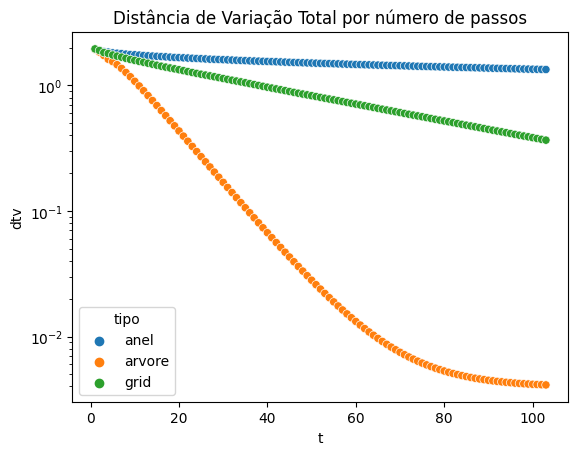

In [29]:
sns.scatterplot(df_grafos, x="t", y="dtv", hue="tipo").set_title("Distância de Variação Total por número de passos")
plt.yscale('log')

O grafo em árvore é o que converge mais rápido, seguido do grafo em grid e depois o grafo em anel.

### Questão 3.1

In [10]:
def matriz_dist(p):
    P = np.zeros((10, 10))
    
    for i in range(1, 11):
        for j in range(1, 11):
            if (j - i == 1) or ((i == j) and (i == 10)):
                P[i-1, j-1] = p
            elif j == 1:
                P[i-1, j-1] = 1-p
    return P

In [11]:
matriz_dist_25 = matriz_dist(0.25)
matriz_dist_25

array([[0.75, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25],
       [0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25]])

In [12]:
matriz_dist_50 = matriz_dist(0.5)
matriz_dist_50

array([[0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5]])

In [13]:
matriz_dist_75 = matriz_dist(0.75)
matriz_dist_75

array([[0.25, 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.75]])

### Questão 3.2

In [14]:
def vao_espectral(P):
    autovalores = eigvals(P)
    autovalores = abs(autovalores)
    autovalores.sort()
    vao_espectral = autovalores[-1] - autovalores[-2]
    return vao_espectral

In [15]:
vao_espectral_25 = vao_espectral(matriz_dist_25)
vao_espectral_50 = vao_espectral(matriz_dist_50)
vao_espectral_75 = vao_espectral(matriz_dist_75)

In [16]:
print("Vão espectral para p = 0.25: " + str(float(vao_espectral_25)))
print("Vão espectral para p = 0.5: " + str(float(vao_espectral_50)))
print("Vão espectral para p = 0.75: " + str(float(vao_espectral_75)))

Vão espectral para p = 0.25: 0.9993651641633324
Vão espectral para p = 0.5: 0.9996200031652042
Vão espectral para p = 0.75: 0.9996008705059756


### Questão 3.3

In [17]:
def estimar_P(P, p_inicial, n):
    p_local = p_inicial
    for t in range(n):
        p_local = np.matmul(p_local, P)
#        ls_dtv_anel.append(sum(abs(p_local - pi_anel)))
#        ls_t.append(t+1)
    return p_local

In [18]:
p_inicial = np.array([1] + [0]*9)

pi_25 = estimar_P(matriz_dist_25, p_inicial, 1000)
pi_50 = estimar_P(matriz_dist_50, p_inicial, 1000)
pi_75 = estimar_P(matriz_dist_75, p_inicial, 1000)

min_pi_25 = min(pi_25)
min_pi_50 = min(pi_50)
min_pi_75 = min(pi_75)

In [19]:
print("Estado de menor probabilidade para p = 0.25: " + str(np.where(pi_25 == min_pi_25)[0][0]+1) + " com valor " + str(min_pi_25))
print("Estado de menor probabilidade para p = 0.50: " + str(np.where(pi_50 == min_pi_50)[0][0]+1) + " com valor " + str(min_pi_50))
print("Estado de menor probabilidade para p = 0.75: " + str(np.where(pi_75 == min_pi_75)[0][0]+1) + " com valor " + str(min_pi_75))

Estado de menor probabilidade para p = 0.25: 10 com valor 3.814697265625e-06
Estado de menor probabilidade para p = 0.50: 9 com valor 0.001953125
Estado de menor probabilidade para p = 0.75: 9 com valor 0.025028228759765625


### Questão 3.4

In [20]:
def estimar_tempo_de_mistura(vao_espectral, min_pi, e=0.000001):
    lim_inf = (1/vao_espectral-1)*np.log(1/(2*e))
    lim_sup = np.log(1/(min_pi*e))/vao_espectral
    return lim_inf, lim_sup

In [21]:
lim_inf_25, lim_sup_25 = estimar_tempo_de_mistura(vao_espectral_25, min_pi_25)
lim_inf_50, lim_sup_50 = estimar_tempo_de_mistura(vao_espectral_50, min_pi_50)
lim_inf_75, lim_sup_75 = estimar_tempo_de_mistura(vao_espectral_75, min_pi_75)

In [22]:
print("Tempo de mistura para p = 0.25. Limite inferior: " + str(lim_inf_25) + ". Limite superior: " + str(lim_sup_25))
print("Tempo de mistura para p = 0.50. Limite inferior: " + str(lim_inf_50) + ". Limite superior: " + str(lim_sup_50))
print("Tempo de mistura para p = 0.75. Limite inferior: " + str(lim_inf_75) + ". Limite superior: " + str(lim_sup_75))

Tempo de mistura para p = 0.25. Limite inferior: 0.008335838422710778. Limite superior: 26.308861616219193
Tempo de mistura para p = 0.50. Limite inferior: 0.004988352106464704. Limite superior: 20.061458473725185
Tempo de mistura para p = 0.75. Limite inferior: 0.00523961353952955. Limite superior: 17.510250356063267


Quanto maior o p, menor é o tempo de mistura

### Questão 4.1

In [24]:
class SimuladorMarkov():
    def __init__(self, p):
        self.X = [1, 1]
        self.p = p
        self.t = 0
        self.historico_estados = []
        self.historico_tempos_retornos = []

    def andar_n_passos(self, n):
        for i in range(n):
            self.t += 1
            rd_local = rd.random()
            if rd_local < self.p/2:
                self.X[0] = self.X[0] + 1
            elif rd_local < self.p:
                self.X[1] = self.X[1] + 1
            elif rd_local < (1+self.p)/2:
                if (self.X[0]-1 >= 1):
                    self.X[0] = self.X[0]-1
            else:
                if (self.X[1]-1 >= 1):
                    self.X[1] = self.X[1]-1
            self.historico_estados.append(copy(self.X))
            if self.X == [1, 1]:
                self.historico_tempos_retornos.append(copy(self.t))
                self.t = 0

    def calcular_dist_origem(self):
        return abs(self.X[0]-1)+abs(self.X[1]-1)

    def retornar_estimador_pi(self):
        return 1/np.mean(self.historico_tempos_retornos)

### Questão 4.2

In [31]:
p = 0.25
simulador = SimuladorMarkov(p)
simulador.andar_n_passos(100000)
print("Valor estimado de pi para p = 0.25: " + str(simulador.retornar_estimador_pi()))

Valor estimado de pi para p = 0.25: 0.44292


In [33]:
p = 0.35
simulador = SimuladorMarkov(p)
simulador.andar_n_passos(100000)
print("Valor estimado de pi para p = 0.35: " + str(simulador.retornar_estimador_pi()))

Valor estimado de pi para p = 0.35: 0.2089341786835737


In [34]:
p = 0.45
simulador = SimuladorMarkov(p)
simulador.andar_n_passos(100000)
print("Valor estimado de pi para p = 0.45: " + str(simulador.retornar_estimador_pi()))

Valor estimado de pi para p = 0.45: 0.03159789947486871


### Questão 4.3

In [30]:
for n in (10, 100, 1000):
    for p in (0.25, 0.35, 0.45):
        ls_dist_origem = []
        for i in range(10000):
            simulador = SimuladorMarkov(p)
            simulador.andar_n_passos(n)
            dist_origem = simulador.calcular_dist_origem()
            ls_dist_origem.append(dist_origem)
        mean_dist_origem = np.mean(ls_dist_origem)
        print("Distância a origem estimada para n=" + str(n) + " e p=" + str(p) + " igual a " + str(mean_dist_origem))

Distância a origem estimada para n=10 e p=0.25 igual a 0.8582
Distância a origem estimada para n=10 e p=0.35 igual a 1.4434
Distância a origem estimada para n=10 e p=0.45 igual a 2.218
Distância a origem estimada para n=100 e p=0.25 igual a 0.9841
Distância a origem estimada para n=100 e p=0.35 igual a 2.2735
Distância a origem estimada para n=100 e p=0.45 igual a 6.2166
Distância a origem estimada para n=1000 e p=0.25 igual a 1.0179
Distância a origem estimada para n=1000 e p=0.35 igual a 2.3092
Distância a origem estimada para n=1000 e p=0.45 igual a 9.0242
